# Case Study For forcasting Product Wise Data for The month of Jan-2022 

### Uploading Data and necessary packages

In [1]:
#importing Tikinter 
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter.filedialog import askopenfilename

root = tk.Tk()
root.withdraw() #Prevents the Tkinter window to come up
csvpath = askopenfilename()
root.destroy()
#df = pd.read_csv(csvpath) # based on the file path you can change the code here
df = pd.read_excel(csvpath) # for xlsx file
print("{:,} records for Forcasting data".format(len(df)))

4,652 records for Forcasting data


# lets do some EDA before moving further
### Lets check the Data Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   warehouse      4652 non-null   object        
 1   product_id     4652 non-null   object        
 2   date_sold      4652 non-null   datetime64[ns]
 3   orders_count   4652 non-null   int64         
 4   buyers_count   4652 non-null   int64         
 5   units_sold     4652 non-null   int64         
 6   Event          360 non-null    object        
 7   Price_at_sale  4652 non-null   float64       
 8   Promotions     4652 non-null   float64       
 9   Sales value    4652 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 363.6+ KB



### observation: 

we have 2 object column 1 date time column and rest all columns are numeric

# lets see the object data type columns and see thier unique values.

In [3]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print(str(column)+  '  :  ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('*****************************************************************************************')
        print('\n')

warehouse  :  ['W1' 'W3' 'W2']
W2    1814
W1    1693
W3    1145
Name: warehouse, dtype: int64
*****************************************************************************************


product_id  :  ['P2' 'P1' 'P3' 'P4' 'P5']
P2    1093
P1    1092
P3     961
P4     856
P5     650
Name: product_id, dtype: int64
*****************************************************************************************


Event  :  [nan 'covid']
covid    360
Name: Event, dtype: int64
*****************************************************************************************




### lets check the Data Stats

In [4]:
df.describe()

orders_count  buyers_count     units_sold  Price_at_sale   Promotions  \
count   4652.000000   4652.000000    4652.000000    4652.000000  4652.000000   
mean    6574.903482   6533.907137   23338.750215      74.495094     0.027932   
std     4235.075821   4201.546663   16478.269461      12.528687     0.046012   
min        7.000000      7.000000      25.000000      19.446408     0.000000   
25%     3403.000000   3388.750000   11389.250000      66.858104     0.000000   
50%     6184.000000   6151.500000   20579.500000      74.558985     0.000000   
75%     9137.500000   9081.750000   32141.750000      83.531065     0.070000   
max    26885.000000  26509.000000  116548.000000     175.372679     0.130000   

        Sales value  
count  4.652000e+03  
mean   1.801592e+06  
std    1.261459e+06  
min    1.279700e+02  
25%    8.699544e+05  
50%    1.620877e+06  
75%    2.552621e+06  
max    8.239472e+06

### lets check the data for null value

In [5]:
df.isnull().sum()

warehouse           0
product_id          0
date_sold           0
orders_count        0
buyers_count        0
units_sold          0
Event            4292
Price_at_sale       0
Promotions          0
Sales value         0
dtype: int64

## Observation:

we can notice that we have null value present for EVENT . and the event value contains nan and covid value so will replace nan value with normal later

# lets plot some graph to check our data

# Univariate Analysis.

##### product

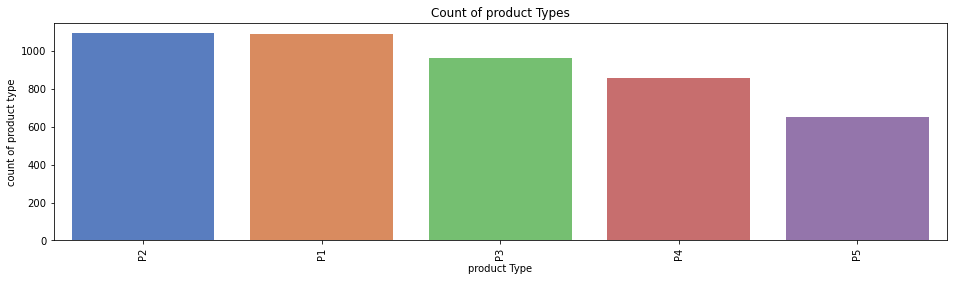

P2    1093
P1    1092
P3     961
P4     856
P5     650
Name: product_id, dtype: int64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,4))
sns.countplot(x='product_id',data=df,palette='muted',order= df['product_id'].value_counts().index)
plt.title('Count of product Types')
plt.xlabel('product Type')
plt.ylabel('count of product type')
plt.xticks(rotation=90)
plt.show()
print(df['product_id'].value_counts())

## Findings:
we can observe more number of product count over the year is for product 2 for the count of 1093

##### Warehouse

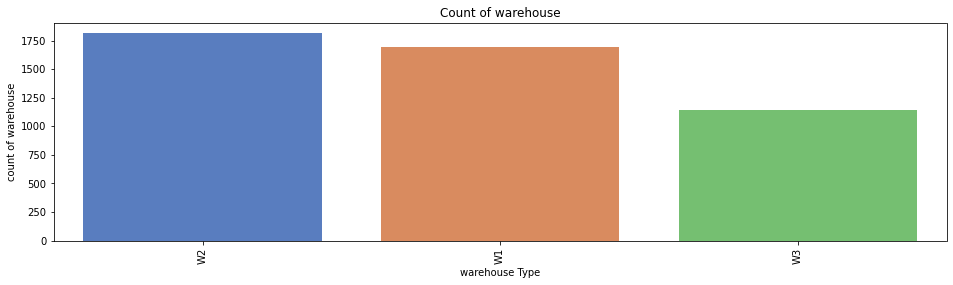

W2    1814
W1    1693
W3    1145
Name: warehouse, dtype: int64


In [7]:

plt.subplots(figsize=(16,4))
sns.countplot(x='warehouse',data=df,palette='muted',order= df['warehouse'].value_counts().index)
plt.title('Count of warehouse')
plt.xlabel('warehouse Type')
plt.ylabel('count of warehouse')
plt.xticks(rotation=90)
plt.show()
print(df['warehouse'].value_counts())

## Findings:
we can observe more number of warehouse count for which product has been dispatched or store is Warehouse2 for 1814 counts

# lets check complete year product wise analysis

In [8]:
df.groupby('product_id')[['orders_count','buyers_count','units_sold','Sales value']].sum()

orders_count  buyers_count  units_sold   Sales value
product_id                                                      
P1               8001506       7942465    27423133  2.298372e+09
P2               9732220       9679477    36073697  2.647088e+09
P3               4256794       4232581    13590337  1.105842e+09
P4               5451030       5418207    19995086  1.415003e+09
P5               3144901       3123006    11489613  9.147036e+08

#### Findings:
above we can observe the sales value over the complete year for each products

#### plotting interactive Bar chart considering all the parameters for complete year.

In [9]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(df.groupby('product_id')['Sales value'].sum().sort_values(ascending=False), y='Sales value',title='Sales value over the year for different products')
fig.show()
fig = px.bar(df.groupby('product_id')['units_sold'].sum().sort_values(ascending=False), y='units_sold',title='unit sold over the year for different products')
fig.show()
fig = px.bar(df.groupby('product_id')['buyers_count'].sum().sort_values(ascending=False), y='buyers_count',title='buyer count over the year for different products')
fig.show()
fig = px.bar(df.groupby('product_id')['Price_at_sale'].mean().sort_values(ascending=False), y='Price_at_sale',title='Mean Price_at_sale over the year for different products')
fig.show()

# lets check the data specially for covid period

In [10]:
# lets just replace the nan value with normal time
df['Event']=df['Event'].replace(np.nan,'normal')
df['Event'].value_counts()

normal    4292
covid      360
Name: Event, dtype: int64

In [11]:
df_covid=df.loc[df['Event'] == 'covid']
df_covid

warehouse product_id  date_sold  orders_count  buyers_count  units_sold  \
1080        W2         P2 2021-04-01         13492         13408       45900   
1081        W1         P2 2021-04-01         11749         11694       41998   
1082        W3         P1 2021-04-01          5777          5741       17783   
1083        W1         P4 2021-04-01         12700         12629       42968   
1084        W2         P1 2021-04-01          7290          7223       27558   
...        ...        ...        ...           ...           ...         ...   
1435        W2         P3 2021-04-30          7890          7857       27869   
1436        W2         P4 2021-04-30          1201          1198        5020   
1437        W1         P1 2021-04-30          9408          9337       49485   
1438        W3         P1 2021-04-30          7285          7256       23500   
1439        W1         P5 2021-04-30          8391          8299       39287   

      Event  Price_at_sale  Promotions   Sales value  
1080  covid      80.613332        0.07  3.959163e+06  
1081  covid      74.607607        0.07  3.352706e+06  
1082  covid      80.712867        0.07  1.535789e+06  
1083  covid      74.601394        0.07  3.429856e+06  
1084  covid      83.957595        0.07  2.475663e+06  
...     ...            ...         ...           ...  
1435  covid      83.236047        0.00  2.319705e+06  
1436  covid      49.453572        0.00  2.482569e+05  
1437  covid      75.329284        0.00  3.727670e+06  
1438  covid      88.014331        0.00  2.068337e+06  
1439  covid      84.644054        0.00  3.325411e+06  

[360 rows x 10 columns]

In [12]:
df_covid.groupby('product_id')[['orders_count','buyers_count','units_sold','Sales value']].sum()

orders_count  buyers_count  units_sold   Sales value
product_id                                                      
P1                705453        699840     2849186  2.213972e+08
P2                851769        847698     3445880  2.316442e+08
P3                324745        322855     1267032  9.990690e+07
P4                402804        400053     1723048  1.071447e+08
P5                378496        376061     1537135  1.181060e+08

#### Findings:
-- above we can observe the sales value for covid time period for each products.


-- Here in our Dataset covid period is in the month April 4th month.

#### plotting interactive Bar chart considering all the parameters for just period of covid events.

In [13]:
fig = px.bar(df_covid.groupby('product_id')['Sales value'].sum().sort_values(ascending=False), y='Sales value',title='Sales value during covid for different products')
fig.show()
fig = px.bar(df_covid.groupby('product_id')['units_sold'].sum().sort_values(ascending=False), y='units_sold',title='unit sold during covid for different products')
fig.show()
fig = px.bar(df_covid.groupby('product_id')['buyers_count'].sum().sort_values(ascending=False), y='buyers_count',title='buyer count during covid for different products')
fig.show()
fig = px.bar(df_covid.groupby('product_id')['Price_at_sale'].mean().sort_values(ascending=False), y='Price_at_sale',title='Mean Price_at_sale during covid for different products')
fig.show()

#  sales each month

In [14]:
df['month'] = pd.DatetimeIndex(df['date_sold']).month

In [15]:
df.groupby('month')['Event'].value_counts()

month  Event 
1      normal    372
2      normal    336
3      normal    372
4      covid     360
5      normal    383
6      normal    390
7      normal    403
8      normal    404
9      normal    390
10     normal    403
11     normal    408
12     normal    431
Name: Event, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(df.groupby('month')['Sales value'].sum().sort_values(ascending=False), y='Sales value',title='Sales value each month')
fig.show()

### Findings:
--- Above we can observe the sales value irrespective of product for each months

# warehouse Analysis

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(df.groupby('warehouse')['Sales value'].sum().sort_values(ascending=False), y='Sales value',title='Sales value over the year from different warehouse')
fig.show()
fig = px.bar(df.groupby('warehouse')['units_sold'].sum().sort_values(ascending=False), y='units_sold',title='units_sold over the year from different warehouse')
fig.show()

### Checking the product counts with respective warehouse

warehouse  product_id
W1         P1            365
           P2            365
           P3            365
           P4            365
           P5            233
W2         P3            365
           P5            365
           P2            364
           P1            362
           P4            358
W3         P1            365
           P2            364
           P3            231
           P4            133
           P5             52
Name: product_id, dtype: int64


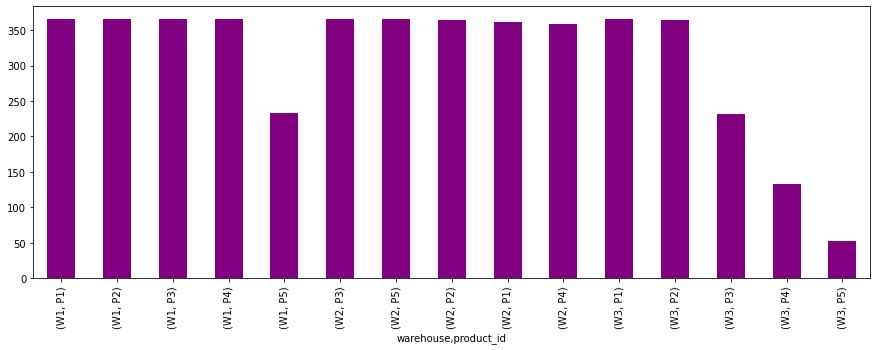

In [18]:
df.groupby('warehouse')['product_id'].value_counts().plot(kind="bar",figsize=(15,5),color='purple')
print(df.groupby('warehouse')['product_id'].value_counts())

# Building Model using Fb prophet:
why i used fb prophet because it works well for seasonality and trend data and for forcasting. as i also tried arima model but its not working good as fbprophet is working.

In [19]:
from fbprophet import Prophet

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['warehouse']= label_encoder.fit_transform(df['warehouse'])
df['Event']= label_encoder.fit_transform(df['Event']) 


In [21]:
df_final=df[['warehouse', 'product_id', 'date_sold', 'orders_count', 'buyers_count','units_sold', 'Event', 'Price_at_sale', 'Promotions', 'Sales value']].rename({'date_sold':'ds','Sales value':'y'}, axis='columns')

### checking corealtion with my target variable that is sales value

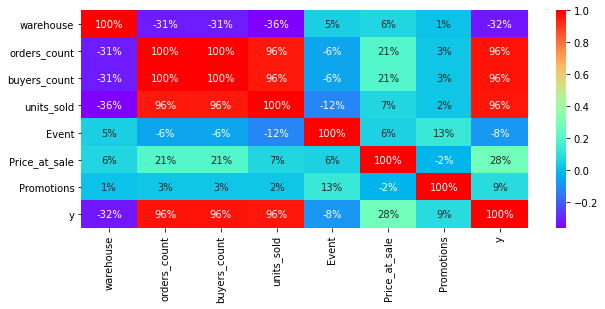

In [22]:
plt.figure(figsize=(10,4))
sns.heatmap(df_final.corr(),annot=True,fmt='.0%',cmap='rainbow')

Text(0.5, 1.0, 'Corelation with Target variables')

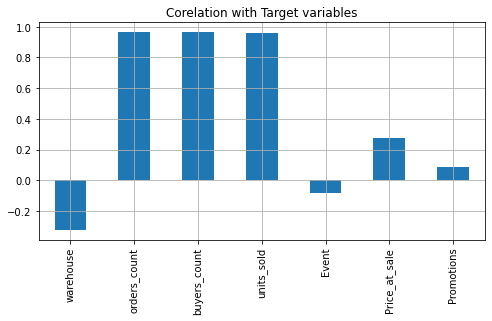

In [23]:
plt.figure(figsize=(8,4))
df_final.drop('y',axis=1).corrwith(df_final['y']).plot(kind='bar',grid=True)
plt.title('Corelation with Target variables')

### Findings
-- Above we can observe that all are highly likely corelated accept of warehouse , and i think we need to bother more about products rather than warehouse because the product are equally distributed in every warehouse. so i am dropping warehouse column before training my model

In [24]:
df_final.drop(columns='warehouse',inplace=True)

# lets do predcition using facebook propet.

### 1. for Product1 considering covid to be expected in the month of jan.

In [25]:
product1 = df_final[df_final['product_id'] == 'P1']

In [26]:
targetp1 = pd.DataFrame()

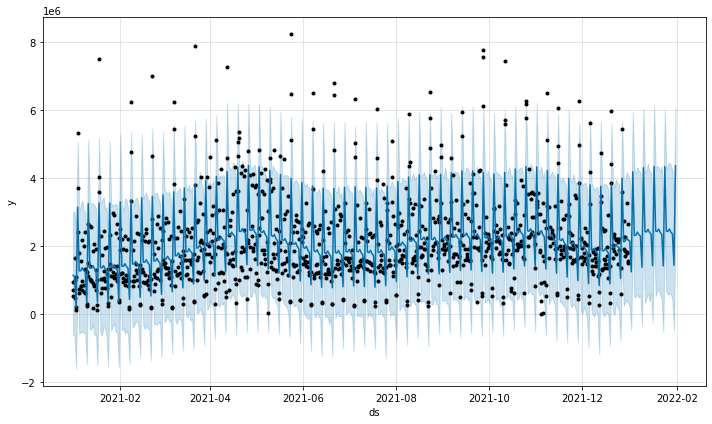

In [27]:
from fbprophet.plot import add_changepoints_to_plot
m1 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,changepoint_prior_scale=.1)
m1.fit(product1)


future = m1.make_future_dataframe(periods=31,freq='D')
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Event'] = 0


forecast1 = m1.predict(future)  
m1.plot(forecast1)  

forecast1 = forecast1.rename(columns={'yhat': 'yhat_'})
targetp1 = pd.merge(targetp1, forecast1.set_index('ds'), how='outer', left_index=True, right_index=True)

In [28]:
targetp1.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat_'],
      dtype='object')

# lets check the error

In [29]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import warnings
warnings.filterwarnings("ignore")

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-12-11 00:00:00 and 2021-12-11 00:00:00


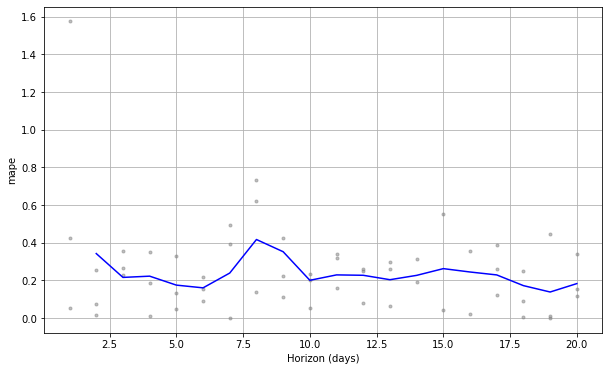

mape: 23.34%


In [30]:
df_cv1 = cross_validation(m1, initial='340 days', period='30 days', horizon = '20 days')
df_p1 = performance_metrics(df_cv1)
fig = plot_cross_validation_metric(df_cv1, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p1['mape'].mean()))

#### observation:
    we got a considerable mape error, so my model is working well .

### 2. for P2 is expected to have 20% promotion from 15th-30th of Jan'2022 and buyers expected to grow by 22%


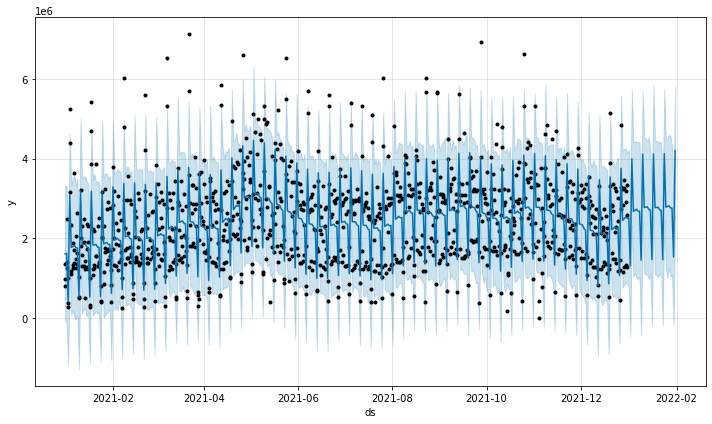

In [31]:
product2 = df_final[df_final['product_id'] == 'P2']
targetp2 = pd.DataFrame()
from fbprophet.plot import add_changepoints_to_plot
m2 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,changepoint_prior_scale=.1)
m2.fit(product2)


future = m2.make_future_dataframe(periods=31,freq='D')
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Event'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Promotions'] = product2['Promotions']*0.2+product2['Promotions']
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'buyers_count'] = product2['buyers_count']*0.22+product2['buyers_count']



forecast2 = m2.predict(future)  
m2.plot(forecast2)  

forecast2 = forecast2.rename(columns={'yhat': 'yhat_'})
targetp2 = pd.merge(targetp2, forecast2.set_index('ds'), how='outer', left_index=True, right_index=True)

# lets check the error

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-12-11 00:00:00 and 2021-12-11 00:00:00


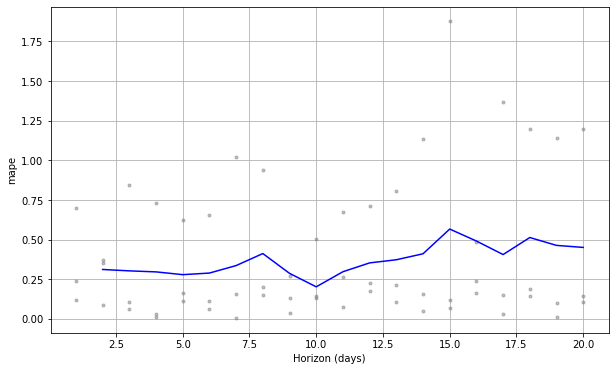

mape: 37.03%


In [32]:
df_cv2 = cross_validation(m2, initial='340 days', period='30 days', horizon = '20 days')
df_p2 = performance_metrics(df_cv2)
fig = plot_cross_validation_metric(df_cv2, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p2['mape'].mean()))

### 3. for P3  is expected to have a price increase of 15% and covid impact in Jan'2022



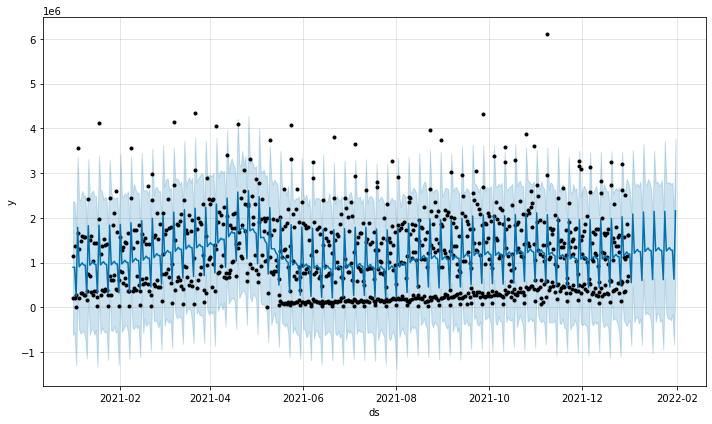

In [33]:
product3 = df_final[df_final['product_id'] == 'P3']
targetp3 = pd.DataFrame()
from fbprophet.plot import add_changepoints_to_plot
m3 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,changepoint_prior_scale=.1)
m3.fit(product3)


future = m3.make_future_dataframe(periods=31,freq='D')
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Event'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Price_at_sale'] = product3['Price_at_sale']*0.15+product3['Price_at_sale']

forecast3 = m3.predict(future)  
m3.plot(forecast3)  

forecast3 = forecast3.rename(columns={'yhat': 'yhat_'})
targetp3 = pd.merge(targetp3, forecast3.set_index('ds'), how='outer', left_index=True, right_index=True)

### 4. for P4  has covid impact, price decrease of 5%, buyers expected to reduce by 14% 



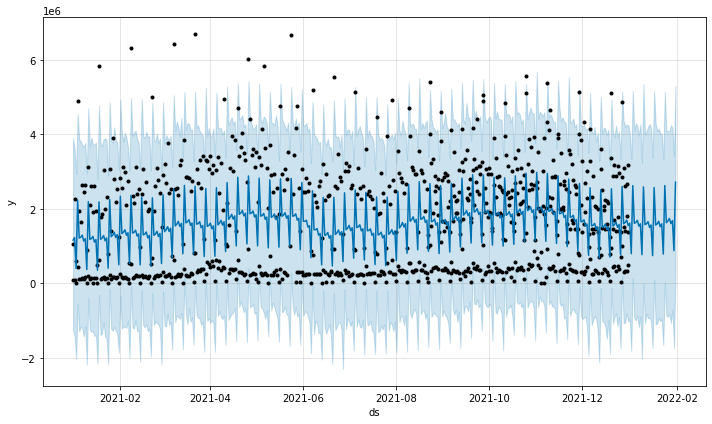

In [34]:
product4 = df_final[df_final['product_id'] == 'P4']
targetp4 = pd.DataFrame()
from fbprophet.plot import add_changepoints_to_plot
m4 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,changepoint_prior_scale=.1)
m4.fit(product4)


future = m4.make_future_dataframe(periods=31,freq='D')
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Event'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Price_at_sale'] =product4['Price_at_sale'] - product4['Price_at_sale']*0.05
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'buyers_count'] =product4['buyers_count'] - product4['buyers_count']*0.14
forecast4 = m4.predict(future)  
m4.plot(forecast4)  

forecast4 = forecast4.rename(columns={'yhat': 'yhat_'})
targetp4 = pd.merge(targetp4, forecast4.set_index('ds'), how='outer', left_index=True, right_index=True)

### 5. for P5  has covid impact, price decrease of 5%, buyers expected to reduce by 14% 



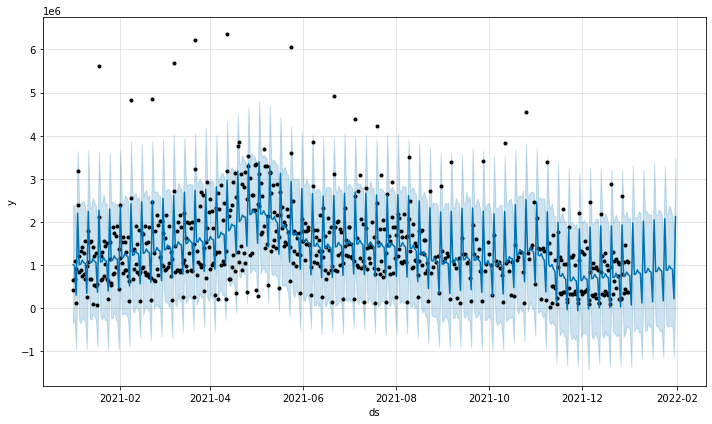

In [35]:
product5 = df_final[df_final['product_id'] == 'P5']
targetp5 = pd.DataFrame()
from fbprophet.plot import add_changepoints_to_plot
m5 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,changepoint_prior_scale=.1)
m5.fit(product5)


future = m5.make_future_dataframe(periods=31,freq='D')
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Event'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'Price_at_sale'] =product5['Price_at_sale'] - product5['Price_at_sale']*0.05
future.loc[(future['ds'] >= pd.to_datetime('2022-01-01')) & (future['ds'] <= pd.to_datetime('2022-01-31')), 'buyers_count'] =product5['buyers_count'] - product5['buyers_count']*0.14
forecast5 = m5.predict(future)  
m5.plot(forecast5)  

forecast5 = forecast5.rename(columns={'yhat': 'yhat_'})
targetp5 = pd.merge(targetp5, forecast5.set_index('ds'), how='outer', left_index=True, right_index=True)

# lets save all the predicted data of future value

In [36]:
pwise_sale=pd.DataFrame()
pwise_sale['Predicted_p1']=targetp1['yhat_']
pwise_sale['Predicted_p2']=targetp2['yhat_']
pwise_sale['Predicted_p3']=targetp3['yhat_']
pwise_sale['Predicted_p4']=targetp4['yhat_']
pwise_sale['Predicted_p5']=targetp5['yhat_']

In [37]:
pwise_sale.reset_index(inplace=True)
pwise_sale = pwise_sale[(pwise_sale['ds'] > '2021-12-31') & (pwise_sale['ds'] <= '2022-01-31')]

In [38]:
pwise_sale.sum()

Predicted_p1    7.866350e+07
Predicted_p2    8.524783e+07
Predicted_p3    4.035834e+07
Predicted_p4    5.095558e+07
Predicted_p5    2.910884e+07
dtype: float64

# lets plot all the predicted sales for the month of January 2022

In [39]:
fig = px.bar(pwise_sale.groupby('ds')['Predicted_p1'].sum().sort_values(ascending=False), y='Predicted_p1',title='predicted Sales value for product 1')
fig.show()
fig = px.bar(pwise_sale.groupby('ds')['Predicted_p2'].sum().sort_values(ascending=False), y='Predicted_p2',title='predicted Sales value for product 2')
fig.show()
fig = px.bar(pwise_sale.groupby('ds')['Predicted_p3'].sum().sort_values(ascending=False), y='Predicted_p3',title='predicted Sales value for product 3')
fig.show()
fig = px.bar(pwise_sale.groupby('ds')['Predicted_p4'].sum().sort_values(ascending=False), y='Predicted_p4',title='predicted Sales value for product 4')
fig.show()
fig = px.bar(pwise_sale.groupby('ds')['Predicted_p5'].sum().sort_values(ascending=False), y='Predicted_p5',title='predicted Sales value for product 5')
fig.show()


### observation:
    above we can see all the predicted data for the month of january

# lets save the predicted data

In [40]:
pwise_sale.to_csv("sales_predicted.csv")